In [40]:
#| echo: false
from utils import build_buttons
from importlib import reload
import utils
reload(utils)
utils.build_buttons(link= 'browser_automation', 
                    github= 'https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb',
                    colab = False,
                    citation= True)


<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://inspectelement.org/browser_automation">📖 Read online</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb">⚙️ GitHub</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_self" href="#citation">🏛 Citation</a>
<br>


Browser automation is a fundamental web scraping technique for building your own dataset.

It is essential for investigating personalization, working with rendered elements, and waiting for scripts and code to execute on a web page.

However, browser automation can be resource intensive and slow compared to other data collection approaches.

👉[Click here to jump to the Selenium tutorial](#tutorial).

# Intro

If you’ve tried to buy concert tickets to a popular act lately, you’ve probably watched in horror as the blue “available” seats evaporate before your eyes the instant tickets are released. Part of that may be pure ✨star-power✨, but more than likely, it’s also because bots were programmed to buy tickets to be resold at a premium.

These bots are programmed to act like an eager fan: waiting in the queue, selecting a seat, and paying for the show. These tasks can all be executed using browser automation.

**Browser automation** is used to programmatically interact with web applications. 

The most frequent use case for browser automation is to run tests on websites by simulating user behavior (mouse clicks, scrolling, and filling out forms). This is routine and invisible work that you wouldn’t remember, unlike seeing your dream of crowd surfing with your favorite musician disappear thanks to ticket-buying bots.

But browser automation has another use, one which _may_ make your dreams come true: web scraping.

Browser automation isn’t always the best situation for building a dataset, but it is necessary when you need to:

1. **Analyze rendered HTML**: see what's on a website as a user would.
2. **Simulate user behavior**: experiment with personalization and experience a website as a user would.
3. **Trigger event execution**: retrieve responses to JavaScript or [network requests](/apis.html) following an action.

These reasons are often interrelated, but we will highlight case studies (below) that demonstrate each strength and why browser automation was a necessary choice for past investigations.

Some popular browser automation tools are [Puppeteer](https://pptr.dev/), [Playwright](https://playwright.dev/), and [Selenium](https://www.selenium.dev/documentation/webdriver/elements/). 

## Headless Browsing

Browser automation can be executed in a "headless" state by some tools.

This doesn't mean that the browser is a ghost or anything like that, it just means that the _user interface_ is not visible.

One benefit of headless browsing is that it is less [resource intensive](/apis.html#case-study-on-scalability-collecting-internet-plans), however there is no visibility into what the browser is doing, making headless scrapers difficult to debug.

Luckily, some browser automation tools (such as Selenium) allow you to [toggle headless browsing](https://www.selenium.dev/blog/2023/headless-is-going-away/) on and off. Other tools, such as Puppeteer only allow you to use headless browsing.

If you’re new to browser automation, we suggest not using headless browsing off the bat. We suggest you try Selenium, which is exactly what we’ll do in the [tutorial](#tutorial) below.

<figure>
<img src="assets/browser-automation.gif" width=100%></video><figcaption align = "left" style="font-size:80%;">Using Selenium to automate browsing TikTok's "For You" page for food videos.</figcaption>
</figure>

# Case Studies
## Case Study 1: Google Search
In the investigation “[Google the Giant](https://themarkup.org/google-the-giant/2020/07/28/google-search-results-prioritize-google-products-over-competitors),” The Markup wanted to measure how much of a Google Search page is “Google.” Aside from the daunting task of classifying what is "Google," and what is "not Google," the team of two investigative journalists-- Adrianne Jeffries and Leon Yin (a co-author of this section) needed to measure real estate on a web page.

The team developed a [targeted staining technique](https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool) inspired by the life sciences, originally used to highlight the presence of chemicals, compounds, or cancers. 

<figure>
<img src="assets/browser0_01_threestep1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
     style="width:90%" 
    />
<figcaption align = "left" style="font-size:80%;"> 
Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">The Markup</a>
</figcaption>
</figure>

The reporters wrote over [68 web parsers](https://github.com/the-markup/investigation-google-search-audit/blob/master/utils/parsers.py) to identify elements on trending Google Search results as "Google," or three other categories. Once an element was identified, they could find the [coordinates](https://developer.mozilla.org/en-US/docs/Web/SVG/Element/rect) of each element along with its corresponding bounding box. Using the categorization and bounding box, The Markup were able to measure how many pixels were allocated to Google properties, as well as where they were placed on a down the page for a mobile phone.

<figure>
<img src="assets/browser0_02_soup1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
     style="width:90%" 
     / >
<figcaption align = "left" style="font-size:80%;"> 
Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">The Markup</a>
</figcaption>
</figure>

Browser automation tools' ability to collect and analyze **rendered HTML pages** can be essential. This is especially the case for search results, since most search results contain modules, carousels, as well as non-standardized rows and columns that are more complex than a list.

Rendered HTML can be used to analyze the allocation of real estate on a website, which can be a useful metric to gauge self-preferencing and [anti-competitive business practices](https://themarkup.org/amazons-advantage/2021/10/14/amazon-puts-its-own-brands-first-above-better-rated-products) relevant to [antitrust](https://themarkup.org/google-the-giant/2020/07/29/congressman-says-the-markup-investigation-proves-google-has-created-a-walled-garden). Take for example this case study, which was placed above the others because one of this section's co-authors happened to work on it.

## Case Study 2: Deanonymizing Google's Ad Network

Google ad sellers offer space on websites like virtual billboards, and are compensated by Google after an ad is shown. However, unlike physical ad sellers, almost all of the ~1.3 million ad sellers on Google are anonymous. To limit transparency further, multiple websites and apps can be monetized by the same seller, and it’s not clear which websites are part of Google’s ad network in the first place. 

As a result, [advertisers](https://checkmyads.org/branded/google-ads-has-become-a-massive-dark-money-operation/) and the public do not know who is making money from Google ads. Fortunately, watchdog groups, industry analysts, and reporters have developed methods to hold Google accountable for this oversight.

The methods boil down to triggering a JavaScript function that sends a request to Google to show an ad on a loaded web page. Importantly, the request reveals the seller ID used to monetize the website displaying the ad, and in doing so, links the seller ID to the website.

In 2022, reporters from ProPublica used Playwrite to [automated this process](https://www.propublica.org/article/google-display-ads-piracy-porn-fraud) to visit 7 million websites and deanonymize over 900,000 Google ad sellers. Their investigation found some websites were able to monetize advertisements, despite breaking Google’s policies.

ProPublica's investigation used browser automation tools to **trigger event execution** to successfully load ads. Often, this required waiting a page to fully render, scrolling down to potential ad space, and browsing multiple pages. The reporters used a combination of network requests, rendered HTML, and cross-referencing screenshots to confirm that each website monetized ads from Google’s ad network.

Browser automation can help you trawl for clues, especially when it comes to looking for specific network requests sent to a central player by many different websites.

## Case Study 3: TikTok Personalization
An investigation conducted by the Wall Street Journal, "[Inside TikTok's Algorithm](https://www.wsj.com/articles/tiktok-algorithm-video-investigation-11626877477)" found that even when a user does not like, share, or follow any creators, TikTok still personalizes their "For You" page based on how long they watch the recommended videos.

In particular, the WSJ investigation found that users who watch content related to depression and skip other content are soon presented with mental health content and little else. Importantly, this effect happened even when the users did not explicitly like or share any videos, nor did they follow any creators. 

You can watch the WSJ's video showing how they mimic user behavior to study the effects of personalization:

<figure>
<video width=100% controls loop>
  <source src="assets/wsj_tiktok.mp4">
</video><figcaption align = "left" style="font-size:80%;">Source: WSJ</figcaption>
</figure>


This investigation was possible only after **simulating user behavior** and triggering personalization from TikTok's "For You" recommendations.

# Tutorial
In the hands-on tutorial we will attempt to study personalization on TikTok with a mock experiment. 

We’re going to teach you the basics of browser automation in Selenium, but the techniques we'll discuss could be used to study any other website using any other automation tool.

We will try to replicate elements of the WSJ investigation and see if we can trigger a personalized "For You" page. Although the WSJ ran their investigation using an Android on a Raspberry Pi, we will try our luck with something you can run locally on a personal computer using browser automation.

In this tutorial we'll use Selenium to watch TikTok videos where the description mentions keywords of our choosing, while skipping all others. In doing so, you will learn practical skills such as:

* Setting up the automated browser in Python
* Hiding signs that are easy tells of an automated browser
* Finding particular elements on the screen, extracting their content, and interacting with them
* Scrolling
* Taking screenshots

Importantly, we’ll be watching videos with lighter topics than depression (the example chosen in the WSJ investigation.).

::: {.callout-tip}
#### Pro tip: Minimizing harms
When developing an audit or investigation, start with low-stakes themes: both to minimize your exposure to harmful content and to avoid boosting their popularity, unnecessarily.
:::

## Step 1: Setting up the browser
Our setup will consist of a real browser and an interface that will allow us to control that browser using Python. We chose Google Chrome because it's the most popular browser and easy enough (famous last words) to set up.

### 1.1 Installing Google Chrome
Please download the most recent version [here](https://www.google.com/chrome/).

If you already have Google Chrome installed, make sure it's a latest version by opening Chrome and pasting this address in the address bar: [chrome://settings/help](chrome://settings/help). Now verify that there are no pending updates.

![](assets/browser1_01_version1.png "Google Chrome window showing the current version")

### 1.2 Installing the webdriver
The `webdriver` is our interface between Python and the browser. It is specific to the browser (there are different webdrivers for Firefox [called Gecko], Safari, etc) and even to the particular version of the browser. It's easier to ensure we are working with the correct version by installing a webdriver that automatically detects the current version of Chrome. 

Run the code in the cell below to download the Python package [`chromedriver-binary-auto`](https://pypi.org/project/chromedriver-binary-auto/). Adding an exclamation mark before code in Jupyter notebook allows you to run commands as if you were in your computer terminal's [command line](https://www.computerhope.com/jargon/c/commandi.htm)

In [3]:
!pip install chromedriver-binary-auto

  Preparing metadata (setup.py) ... done
  Created wheel for chromedriver-binary-auto: filename=chromedriver_binary_auto-0.2.6-py3-none-any.whl size=8652851 sha256=1ccd18edd04cf5e1c63e0305676dc1c9c0c0532c8dc09842f6cf963a910e4f04
  Stored in directory: /Users/leon/Library/Caches/pip/wheels/2a/4e/a6/e342ab457a4cd1642a94bbc8f132e56e90a7a320d08d6bfeb2
Successfully built chromedriver-binary-auto


Let's see if the installation worked correctly! Run the cell below to import the correct webdriver and open a new Chrome window.


In [1]:
from selenium import webdriver
import chromedriver_binary # adds the chromedriver binary to the path

driver = webdriver.Chrome()

The `chrome-driver-auto` package should have installed a driver that's suitable for your current Chrome version running the line of code above should have opened a new Chrome window.

This step is notoriously hard, and you might get a version mismatch error:

```
SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 112
Current browser version is 113 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
```
It means that you probably updated your Chrome in the meantime. To fix it, reinstall the Python package:

In [4]:
!pip install --upgrade --force-reinstall chromedriver-binary-auto

  Using cached chromedriver_binary_auto-0.2.6-py3-none-any.whl
  Attempting uninstall: chromedriver-binary-auto
    Found existing installation: chromedriver-binary-auto 0.2.6
    Uninstalling chromedriver-binary-auto-0.2.6:
      Successfully uninstalled chromedriver-binary-auto-0.2.6


If everything works fine and you have the window open, our setup is complete and you can now close the Chrome window:

In [ ]:
driver.close()

## Step 2: Hiding typical tells of an automated browser
When you open Chrome with Selenium you'll notice that the window displays a warning about being an "automated session". 
Even though the warning is only displayed to you, the webdriver leaves behind other red flags that inform website administrators that you are using browser automation.

The website admins will use these red flags to refuse service to your browser.

Let's remove those.

In [8]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")

# remove all signs of this being an automated browser
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# open the browser with the new options
driver = webdriver.Chrome(options=options)
driver.get('https://tiktok.com/foryou')

This should open a new window without those warnings and navigate to tiktok.com:

![](assets/browser1_02_tiktok1.png "tiktok main page")




## Step 3: Finding elements on page and interacting with them

We will perform our mock experiment without logging in (but we will also learn how to create multiple accounts and how to log in later).

Instead of logging in, our first interaction will be dismissing this login window. Doing this programmatically has two steps:

1. We need to identify that \[X\] button in the page source 
2. And then click it

Let's inspect the button element:
![](assets/browser1_03_dismiss1.png "Inspecting the Dismiss button")

In my case, the particular element that the Developer Tools navigated to is just the graphic on the button, not the button itself, but you can still find the actual button by hovering your mouse over different elements in the source and seeing what elements on page are highlighted:

![](assets/browser1_04_inspect1.png "Inspecting the Dismiss button")

Our close button is a `<div>` element, whose `data-e2e` attribute is `"modal-close-inner-button"`. 

There are many ways to fish for the exact element you want, and [many of those methods](https://www.selenium.dev/documentation/webdriver/elements/locators/) are built into Selenium. One way to find it would be using a `CSS_SELECTOR`, like so:

In [4]:
from selenium.webdriver.common.by import By

close_button = driver.find_element(By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')
close_button

<selenium.webdriver.remote.webelement.WebElement (session="710ad56950f0c245bc25a21b57ccf110", element="CD049116A9F70D8AA3FE1F0BC1BBEB15_element_298")>

If Selenium successfully finds an element, you'll get a `WebElement` object of the first match. However, if Selenium **does not** find the element-- for example because the element hasn't loaded yet, you will get an empty object in return. This will crash your script if you try to interact with the empty element. 

One thing you can do is to tell Selenium to wait up to `X_seconds` for that particular element before trying to click on it, like this:

In [9]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# let's wait up to 20 seconds
X_seconds = 20
wait = WebDriverWait(driver, timeout = X_seconds)
wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')))

# this line will only execute whenever the element was found (or after 20 seconds it it wasn't)
close_button = driver.find_element(By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')
close_button

<selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_45")>

We seem to have found something, let's click it! `WebElement`s come equipped with special functions you can use to [interact](https://www.selenium.dev/documentation/webdriver/elements/interactions/) with them:

In [10]:
close_button.click()

Did you notice a change on the page? Congratulations! You just automated the browser to click something.

## Step 4: Scrolling

We now have a browser instance open and displaying the For You page. Let's scroll through the videos.

If you are a *real person* who (for whatever reason) visits TikTok on their computer, you could press the down key the keyboard to see new videos. We will do that programmatically instead:

In [11]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

actions = ActionChains(driver)
actions.send_keys(Keys.ARROW_DOWN)
actions.perform()

When you run the cell above you will see that your browser scrolls down to the next video. You just automated scrolling!

## Step 5: Finding TikTok videos on the page

Now that the site loaded and you can browse it, let's find all the TikTok videos that are displayed and extract the information (called metadata) from each of them.

1. Right click on the white space around a TikTok video and choose "Inspect".
![Inspect Element](assets/browser1_05_inspect_tiktok_a1.png)
1. Hover your mouse over the surrounding `<div>` elements and observe the highlighted elements on the page to see which ones correspond to each TikTok video.
![Inspect Element](assets/browser1_05_inspect_tiktok_b1.png)
1. You will see that each video is in a separate `<div>` container but each of these containers has the same `data-e2e` attribute with the value of `recommend-list-item-container`.
1. Similarly to how we found the close button, we can now use this to find all videos on page:

In [12]:
videos = driver.find_elements(By.CSS_SELECTOR, '[data-e2e="recommend-list-item-container"]')

When we searched for the "dismiss" button we used the `driver.find_element()` function because we were only interested in the first element that matched our CSS selector.

Now we're trying to find all videos on page, so we use the `driver.find_elements()` function instead - it returns the complete list of elements that match the selector.

In [13]:
videos

[<selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_73")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_78")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_101")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_160")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_161")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e6fa746d2", element="7B4533C51CF631265A8665122C637150_element_162")>,
 <selenium.webdriver.remote.webelement.WebElement (session="64b92d16043e500c3630742e

## Step 6: Parsing TikTok metadata
Now that we found all the TikTok videos on the page, let's extract the description from each - this is how we will decide whether to watch the video, or to skip it. The process of extracting a specific field from a webpage is "parsing".

1. Pick any description, right click, "Inspect". 
1. Let's locate the `<div>` that contains the whole description (including any hashtags) and make note of its `data-e2s` attribute.
1. Now let's write the code that, extracts the description from a single video (note that you can get the text content of any element by calling `element.text`)

In [14]:
for video in videos:
    print(video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text)


The last one 😂😂 #pet #cat #dog #cute #animals #funny #foryou #fyp
الرد على @hadeelalsamare #اكسبلور #fyp #fypシ
BEST MAGIC TRICKS REVEALED 😱😳 #magician #learnfromme #foru #popular
The most Useful Toy ever! 2 😂 #fun #play #fyp
Iphone 13 pro max #repair #tamarshabi🥰 תיקון
Herb-Crusted Rack of Lamb 😍 #lamb #easyrecipe #easyrecipes #asmrfood #foodtok #cooktok #dinnerwithme #homecook #homecooking #dinnerideas #dinnerparty
#fyp #halsey #geazy #scandal
شو رأيكم كان فيها تكفي اللقمة اللي بتمها؟ 😐#hasanandhawraa #ramdan2023 #رمضان_يجمعنا #رمضان


::: {.callout-note}
Note: We previously searched for elements using `driver.find_element()` and `driver.find_elements()`. That allowed us to search the whole page. Notice that here, instead of `driver`, we're using a particular element which we called `video`: this way we can search for elements **within an element**, rather than on the whole page.
:::

## Step 7: Finding the TikTok video that's currently playing
We know how to scroll to the next video, and we know how to find all videos that are loaded.
At this point we could either:<br>
1. Assume that at the beginning, the 0th video is playing, and then every time we press arrow down, the next video is being displayed<br>
2. Assume that the arrow down does not always work and each time verify which video is actually playing

The problem with the first approach is that even if scrolling fails even just once, our experiment will be compromised - after it happens we will be watching and skipping different videos that our math tells us. This is why we will go with the second approach and verify which video is actually playing. Back to our favorite tool- inspect element!

When you right click on the playing video, you will see that instead of our familiar UI we get a custom TikTok menu, so that won't work. Try right-clicking on the description of the video instead, then hovering over different elements in the inspector and expanding the one that highlights the video in the browser. Dig deep until you get to the `div` that only contains the video. 

Still in the inspector try looking at the video below. You will see that the `div` that contains the video is missing and there is no element with the tag name `video`. That's how we can find if the video is currently playing - its `div` will contain the `video` element that we can find by `TAG_NAME`:

In [15]:
for video in videos:
    description = video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text
    if video.find_elements(By.TAG_NAME, 'video'):
        playing = 'playing'
    else:
        playing = 'not playing'
    print(playing, description)

playing 
not playing The last one 😂😂 #pet #cat #dog #cute #animals #funny #foryou #fyp
not playing الرد على @hadeelalsamare #اكسبلور #fyp #fypシ
not playing BEST MAGIC TRICKS REVEALED 😱😳 #magician #learnfromme #foru #popular
not playing The most Useful Toy ever! 2 😂 #fun #play #fyp
not playing Iphone 13 pro max #repair #tamarshabi🥰 תיקון
not playing Herb-Crusted Rack of Lamb 😍 #lamb #easyrecipe #easyrecipes #asmrfood #foodtok #cooktok #dinnerwithme #homecook #homecooking #dinnerideas #dinnerparty
not playing #fyp #halsey #geazy #scandal
not playing شو رأيكم كان فيها تكفي اللقمة اللي بتمها؟ 😐#hasanandhawraa #ramdan2023 #رمضان_يجمعنا #رمضان


## Step 8: Taking screenshots
The presentation of your results might be more compelling, when its accompanied by screenshots, rather than just data. Selenium allows you to take screenshots of the whole screen, or just a particular element (though the latter is a bit cumbersome):

In [22]:
# take a screenshot of the whole browser
driver.save_screenshot('full_screenshot.png')

# take a screenshot of just one video
screenshot = video.screenshot_as_png
with open('element_screenshot.png', 'wb') as output:
    output.write(screenshot)

In the spirit of _bringing receipts_, you can also save the entire webpage to parse it later.

In [25]:
# save the source of the entire page
page_html = driver.page_source
with open('webpage.html', 'w') as output:
    output.write(page_html)

::: {.callout-tip}
#### Pro tip: Keep these records to sanity check your results
Taking a screenshot and saving the page source is a useful practice for checking your work. Use the two to cross-reference what was visible in the browser and whatever data you end up extracting during the parsing step.
:::

Let's close the browser for now, and kick this workflow up a notch.

In [16]:
driver.close()

## Step 9: Putting it all together
At this point, we can read the description of TikTok videos and navigate the "For You" page. 

That's most of the setup we need to try our mock experiment:<br>
let's watch all TikTok videos that mention food in the description and skip videos that do not mention food.

After one hundred videos, we will see whether we are served videos from FoodTok more frequently than other topics.

::: {.callout-tip}
#### Pro tip: Use functions!
So far we wrote code to open the browser, close the dialog, and find videos as separate cells in the notebook. We _could_ copy that code over here to use it, but it will be much easier to understand and maintain the code if we write clean, well-documented functions with descriptive names.
:::

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import chromedriver_binary



def open_browser():
    """
    Opens a new automated browser window with all tell-tales of automated browser disabled
    """
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")

    # remove all signs of this being an automated browser
    options.add_argument('--disable-blink-features=AutomationControlled')
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option('useAutomationExtension', False)

    # open the browser with the new options
    driver = webdriver.Chrome(options=options)
    return driver

def close_login_dialog(driver):
    """
    Waits for the login dialog to appear, then closes it
    """
    
    # rather than trying to click a button that might have not loaded yet, we will 
    # wait up to 20 seconds for it to actually appear first
    wait = WebDriverWait(driver, timeout = 20)
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')))
   
    close_button = driver.find_element(By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')
    if close_button:
        close_button.click()

def arrow_down(driver):
    """
    Sends the ARROW_DOWN key to a webdriver instance.
    """
    actions = ActionChains(driver)
    actions.send_keys(Keys.ARROW_DOWN)
    actions.perform()
    
def find_videos(driver):
    """
    Finds all tiktoks loaded in the browser
    """
    videos = driver.find_elements(By.CSS_SELECTOR, '[data-e2e="recommend-list-item-container"]')
    return videos

def get_description(video):
    """
    Extracts the video description along with any hashtags
    """
    try:
        description = video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text
    except:
        # if the description is missing, just get any text from the video
        description = video.text
    return description

def get_current(videos):
    """
    Given the list of videos it returns the one that's currently playing
    """
    for video in videos:
        if video.find_elements(By.TAG_NAME, 'video'):
            # this one has the video, we can return it and that ends the function.
            return video
    
    return None

def is_target_video(description, keywords):
    """
    Looks for keywords in the given description. 
    NOTE: only looks for the substring IE partial match is enough.
    Returns `True` if there are any or `False` when there are none.
    """
    # check in any of the keywords is in the description
    for keyword in keywords:
        if keyword in description:
            # we have a video of interest, let's watch it 
            return True
    
    # if we're still here it means no keywords were found
    return False

def screenshot(video, filename="screenshot.png"):
    """
    Saves a screenshot of a given video to a specified file
    """
    screenshot = video.screenshot_as_png
    with open(filename, 'wb') as output:
        output.write(screenshot)
    

Ok, with that out of the way, let's set up our first data collection!

First, let's make a directory to save all of our screenshots. We will save screenshots here whenever we find a video related to food.

In [18]:
import os

os.makedirs('data/screenshots/', exist_ok=True)

In [22]:
import time

# if the description has any one these words, we will watch the video
keywords = ['food', 'dish', 'cook', 'pizza', 'recipe', 'mukbang', 'dinner', 'foodie', 'restaurant']

# this is where will we store decisions we take
decisions = []

# open a browser, and go to TikTok's For You page.
driver = open_browser()
driver.get('https://tiktok.com/foryou')
close_login_dialog(driver)

for tiktok_index in range(0, 100):
    # get all videos
    tiktoks = find_videos(driver)
    
    # the current tiktok is the one that's currently showing the video player
    current_video = get_current(tiktoks)
    
    if current_video is None:
        print('no more videos')
        break
              
    # read the description of the video
    description = get_description(current_video)
    
    # categorize the video as relevant to `keywords` or not.
    contains_keyword = is_target_video(description, keywords)
    decisions.append(contains_keyword )
            
    print(tiktok_index, contains_keyword, description)
    
    if contains_keyword:
        # we have a video of interest, let's take a screenshot
        screenshot(current_video, f"data/screenshots/screenshot_{tiktok_index:05}.png")
        # and now watch it for 30 seconds
        time.sleep(30)
    
    # move to the next video
    arrow_down(driver)
    time.sleep(2)
    
driver.close()

0 False ДО КОНЦА😂 а какой у тебя рост?
1 False • Reprodução: (SBT/Programa Raul Gil) 🇧🇷
#combateaosuicidio
2 False #stitch #이어찍기 #추천 #fyp #viral #xyzbca #korean #おすすめ
3 True Cuando hago papas de esta manera, todos me preguntan por la receta😋😱#viral #parati #recetas #cocina #recetasfaciles #papa #queso #jamon #food #saborestiktok
4 False #ومش_هزود_في_الملام #explore
#fypシ #foryoupage #fyp #viral
#مش_هنظبط_الريتش_بقي🖤 #حزين
#حالات_واتس_حزينه💔 #foryou
5 False #PasiondeGavilanes #telenovelacolombiana
6 False #accident a veces pasa de todo 👉 sigueme para PARTE 2.
7 False Zjedzcie se tez cos fajnego dzis #gotowaniezdominika
8 False كيف تكتب اسم يوسف بخط جميل♥️🌹-
-
-
-
9 False بنت الجنوب 🔥🤍🇹🇳#مطماطة_قابس_تونس #اكسبلور
10 False Game on
11 False Чи бачите різницю між фото? Чи бачите які кадри зроблені на дорогу , а які на дешеву камеру? ☺️ #фотограф #фотоапарат #обзор #фотографія
12 False #bendiciones #mideseo #TikTok #viral #
13 False The most Useful Toy ever! 2 😂 #fun #play #fyp
14 False Repl

::: {.callout-tip}
#### Pro tip: Be careful about keywords
For experiments that use `keywords`, the choices we make will directly shape our results. In the field, you can mitigate your own predisposition and biases by working with [domain experts to curate keyword lists](https://themarkup.org/google-the-giant/2021/04/09/how-we-discovered-googles-social-justice-blocklist-for-youtube-ad-placements#sourcing-social-justice-keywords).
:::

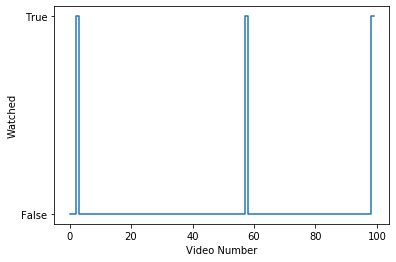

In [24]:
import matplotlib.pyplot as plt
plt.plot(decisions, ds='steps')
plt.xlabel('Video Number')
plt.ylabel('Watched')
plt.yticks([0, 1], ['False', 'True']);

The figure above shows when during our 100-videos-long session we were recommended a video about food (from `keywords`). The x-axis is chronological, the 1st video displayed is on the left, and the most recent video is on the right. The y-axis is "yes" or "no," depending on if the video was related to food. 

### Results

You can look back to the `data/screenshots` folder we created to check whether the videos we watched appear to be food-related. 

If the feed was indeed increasingly filled with food videos, we would see more lines towards the right of the graph. At least here it does not appear to be the case. 

Does it mean that the WSJ investigation was wrong, or that TikTok stopped personalizing content? 

The answer is "No," for several reasons: 

1. We only scrolled through 100 videos, this is likely too few to observe any effects. Try re-running with a higher number!<br>
2. When studying personalization you should use an account per profile and make sure you're logged in, rather than relying on a fresh browser. So, instead of closing the login dialog, try actually logging in! You know how to find and click buttons, and [this is how you put text in text fields](https://www.geeksforgeeks.org/send_keys-element-method-selenium-python/).<br>
3. When you're not logged in, you will be presented with content from all over the world, in all languages. If you filtered `keywords` in just one language, you will miss plenty of target content in other languages.<br>
4. You should always have a baseline to compare to. In this case, you should probably run two accounts at the same time - one that watches food videos and one that doesn't. Then you compare the prevalence of food videos between these two.<br>
5. The WSJ investigation was run on the mobile app rather than on a desktop browser. Perhaps TikTok's personalization works differently based on device or operating system.

## Advanced Usage

Above we highlighted some ideas to make your investigation or study more robust, some are methodological choices, but others are technical.

There are some advanced use-cases and tasks you can perform with browser automation that include

- Authentication using the browser and storing cookies for later use.<br>
- Intercept background [API](/apis.html) calls and combine browser automation with API calls. See [`selenium-wire`](https://pypi.org/project/selenium-wire/) as an example.<br>
- Signing in with one or more email addresses.<br>

We may cover some or all of these topics in subsequent tutorials, but you should feel free to experiment.

Let us know what you're interested in learning more about!

# Related Readings

More tutorials on the same subject:

- "[Using real browsers](https://scrapism.lav.io/using-real-browsers/)" - Sam Lavigne

Notable investigations, audits, and tools using browser automation:

- "[Blacklight](https://themarkup.org/blacklight)" - a investigative tool by Surya Mattu<br>
- "[TheirTube](https://www.their.tube/)" - an art and advocacy project by Tomo Kihara<br>
- "[Worlds Apart](https://www.nrk.no/osloogviken/xl/tiktok-doesn_t-show-the-war-in-ukraine-to-russian-users-1.15921522)" - a TikTok investigation by Henrik Bøe and Christian Nicolai Bjørke<br>
- "[WebSearcher](https://github.com/gitronald/WebSearcher)" - A Python package by Ronald E. Robertson<br>
- "[Googling for Abortion](https://journalqd.org/article/view/2752)" - Yelena Mejova, Tatiana Gracyk, and Ronald E. Robertson<br>
- "[webXray](https://webxray.org/)" - A website forensics tool by Tim Liebert<br>
- "[OpenWPM](https://github.com/itdelatrisu/OpenWPM)" - A privacy-measurement tool

Please reach out with more examples to add.

# Citation

To cite this chapter, please use the following BibTex entry:

<pre>
@incollection{inspect2023browser,
  author    = {Sapiezynski, Piotr and Yin, Leon},
  title     = {Browser Automation},
  booktitle = {Inspect Element: A practitioner's guide to auditing algorithms and hypothesis-driven investigations},
  year      = {2023},
  editor    = {Yin, Leon and Sapiezynski, Piotr and Raji, Inioluwa Deborah},
  note      = {\url{https://inspectelement.org}}
}
</pre>

## Acknowledgements

Thank you to Ruth Talbot and John West for answering questions about their two respective investigations.